# Import Modules 

In [109]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display,clear_output

# Prepare Dataset

In [111]:
df = pd.read_csv("Dataset.csv",parse_dates=['Date'])

df.columns=['date','well','oilrate','waterrate','sand']
dt = df['date'].dt
df.dropna(inplace=True)

df.head()
df.dtypes

date         datetime64[ns]
well                 object
oilrate             float64
waterrate           float64
sand                 object
dtype: object

# Calculate MHI and Cum MHI

In [131]:
wells = df['well'].unique()
sands = df['sand'].unique()
numeric_cols = df.select_dtypes(include=[np.number]).columns

print(len(wells))
print(len(sands))

df.head()



35
2


,date,well,oilrate,waterrate,sand
0,1987-12-01,01-02,432.0,0.0,CHANNEL
1,1988-01-01,01-02,518.0,0.0,CHANNEL
2,1988-02-01,01-02,452.0,0.0,CHANNEL
3,1988-03-01,01-02,446.0,0.0,CHANNEL
4,1988-04-01,01-02,450.0,0.0,CHANNEL


In [132]:
ave_grouped_rate=df.groupby()

TypeError: You have to supply one of 'by' and 'level'

In [123]:
ave_grouped_rate = df.groupby(['sand','date'])
max_grouped_rate = df.groupby(['sand','date']).max()
min_grouped_rate = df.groupby(['sand','date']).min()

In [135]:
min_grouped_rate

well  oilrate  waterrate
sand    date                                 
CHANNEL 1978-11-01  07-02    287.0        0.0
        1978-12-01  07-02    401.0        0.0
        1979-01-01  07-02    127.0        0.0
        1979-02-01  07-02    129.0        0.0
        1979-03-01  04-11    243.0        0.0
...                   ...      ...        ...
VALLEY  1993-11-01  05-03      8.0        0.0
        1993-12-01  05-02      8.0        0.0
        1994-01-01  05-02      8.0        0.0
        1994-02-01  05-02      9.0        0.0
        1994-03-01  05-02      8.0        0.0

[368 rows x 3 columns]

In [136]:
max_grouped_rate

well  oilrate  waterrate
sand    date                                 
CHANNEL 1978-11-01  07-02    287.0        0.0
        1978-12-01  07-02    401.0        0.0
        1979-01-01  14-02    391.0        0.0
        1979-02-01  15-03    523.0        0.0
        1979-03-01  15-03    364.0        0.0
...                   ...      ...        ...
VALLEY  1993-11-01  16-04    102.0      292.0
        1993-12-01  16-04     98.0      288.0
        1994-01-01  16-04     98.0      297.0
        1994-02-01  16-04    108.0      229.0
        1994-03-01  16-04     98.0       96.0

[368 rows x 3 columns]

In [98]:
mean_grouped_rate = df.groupby(['sand', 'date'])[numeric_cols].mean()
max_grouped_rate = df.groupby(['sand', 'date'])[numeric_cols].max()
min_grouped_rate = df.groupby(['sand', 'date'])[numeric_cols].min()

In [107]:
ave_grouped_rate

oilrate  waterrate
sand    date       well                     
CHANNEL 1978-11-01 07-02    287.0        0.0
        1978-12-01 07-02    401.0        0.0
        1979-01-01 07-02    391.0        0.0
                   09-02    127.0        0.0
                   14-02    307.0        0.0
...                           ...        ...
VALLEY  1994-03-01 08-03     98.0        0.0
                   09-04     49.0       96.0
                   10-03     32.0        4.0
                   15-04     11.0       48.0
                   16-04      9.0       96.0

[3736 rows x 2 columns]

In [214]:
mean_grouped_rate = df.groupby(['sand', 'date'])[['oilrate','waterrate']].mean().reset_index()
max_grouped_rate = df.groupby(['sand', 'date'])[['oilrate','waterrate']].max().reset_index()
min_grouped_rate = df.groupby(['sand', 'date'])[['oilrate','waterrate']].max().reset_index()

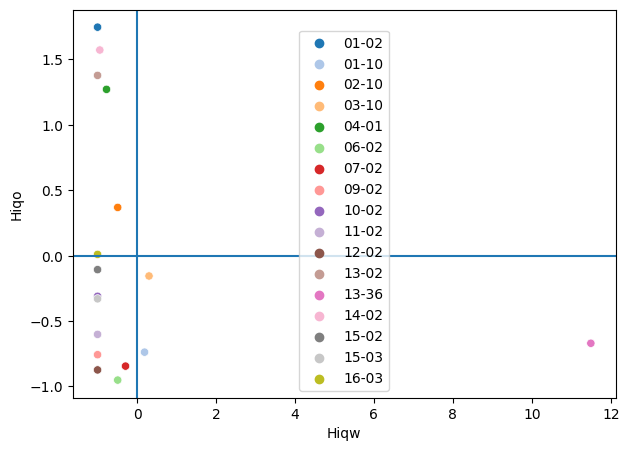

,index,date,well,oilrate,waterrate,sand,qoavg,qomax,qomin,qwmax,qwmin,qwavg,Hiqo,Hiqw,MHiqo,MHiqw
0,75,1994-03-01,01-02,283.0,0.0,CHANNEL,103.058824,283.0,5.0,441.0,0.0,35.294118,1.746005,-1.000000,0.647270,-0.080032
1,188,1994-03-01,01-10,27.0,42.0,CHANNEL,103.058824,283.0,5.0,441.0,0.0,35.294118,-0.738014,0.190000,-0.273593,0.015206
2,272,1994-03-01,02-10,141.0,18.0,CHANNEL,103.058824,283.0,5.0,441.0,0.0,35.294118,0.368151,-0.490000,0.136479,-0.039216
3,406,1994-03-01,03-10,87.0,46.0,CHANNEL,103.058824,283.0,5.0,441.0,0.0,35.294118,-0.155822,0.303333,-0.057766,0.024276
4,573,1994-03-01,04-01,234.0,8.0,CHANNEL,103.058824,283.0,5.0,441.0,0.0,35.294118,1.270548,-0.773333,0.471011,-0.061891
5,986,1994-03-01,06-02,5.0,18.0,CHANNEL,103.058824,283.0,5.0,441.0,0.0,35.294118,-0.951484,-0.490000,-0.352730,-0.039216
6,1205,1994-03-01,07-02,16.0,25.0,CHANNEL,103.058824,283.0,5.0,441.0,0.0,35.294118,-0.844749,-0.291667,-0.313161,-0.023343
7,1627,1994-03-01,09-02,25.0,0.0,CHANNEL,103.058824,283.0,5.0,441.0,0.0,35.294118,-0.757420,-1.000000,-0.280787,-0.080032
8,2000,1994-03-01,10-02,71.0,0.0,CHANNEL,103.058824,283.0,5.0,441.0,0.0,35.294118,-0.311073,-1.000000,-0.115320,-0.080032
9,2232,1994-03-01,11-02,41.0,0.0,CHANNEL,103.058824,283.0,5.0,441.0,0.0,35.294118,-0.602169,-1.000000,-0.223233,-0.080032


In [260]:
fecha='1994-03-01'
formation='CHANNEL'

df_=df[(df['date']==fecha)&(df['sand']==formation)].reset_index()
avg_=df[(df['date']==fecha)&(df['sand']==formation)].reset_index()[['oilrate','waterrate']].mean()
max_=df[(df['date']==fecha)&(df['sand']==formation)].reset_index()[['oilrate','waterrate']].max()
min_=df[(df['date']==fecha)&(df['sand']==formation)].reset_index()[['oilrate','waterrate']].min()


df_['qomax']=max_['oilrate']
df_['qomin']=min_['oilrate']
df_['qwmax']=max_['waterrate']
df_['qwmin']=min_['waterrate']

df_['qoavg']=avg_['oilrate']
df_['qwavg']=avg_['waterrate']

df_['Hiqo']=(df_['oilrate']/avg_['oilrate'])-1
df_['Hiqw']=(df_['waterrate']/avg_['waterrate'])-1
df_['MHiqo']=(df_['oilrate']-df_['qoavg'])/(df_['qomax']-df_['qomin'])
df_['MHiqw']=(df_['waterrate']-df_['qwavg'])/(df_['qwmax']-df_['qwmin'])

sns.scatterplot(y='Hiqo', x='Hiqw', data=df_, hue='well', palette='tab20')
plt.tight_layout()
plt.axhline(0)
plt.axvline(0)
plt.legend()
plt.show()
df_